In [60]:
# Importando librerias (comentario bonito)

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Hola mundo")

Hola mundo


In [61]:
url = "https://api.covidtracking.com/v1/states/daily.json"
response = requests.get(url)
if response.status_code != 200:
    print("error")
data = response.json()
df = pd.DataFrame(data)

In [62]:
#mostramos las primeras 5 líneas del dataframe
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,


In [63]:
#ejecutamos el método .info para tener una visión general de las columnas, los datos y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   float64
 13  onVentilatorCumu

In [64]:
#cuantificamos la cantidad de datos nulos por cada columna (axis=0 indica que la suma debe realizarse a lo largo del eje vertical, es decir por columnas)
df.isnull().sum(axis = 0)

date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
d

In [65]:
categoricas = ["date", "state"]
numericas = ["positive", "negative", "pending", "hospitalizedCurrently", "death", "recovered"]

In [66]:
col_seleccionadas = categoricas + numericas
new_df = df.loc[:,col_seleccionadas]
#new_df = new_df.dropna()
new_df

,date,state,positive,negative,pending,hospitalizedCurrently,death,recovered
0,20210307,AK,56886.0,NaN,NaN,33.0,305.0,NaN
1,20210307,AL,499819.0,1931711.0,NaN,494.0,10148.0,295690.0
2,20210307,AR,324818.0,2480716.0,NaN,335.0,5319.0,315517.0
3,20210307,AS,0.0,2140.0,NaN,NaN,0.0,NaN
4,20210307,AZ,826454.0,3073010.0,NaN,963.0,16328.0,NaN
...,...,...,...,...,...,...,...,...
20775,20200117,WA,0.0,NaN,NaN,NaN,NaN,NaN
20776,20200116,WA,0.0,NaN,NaN,NaN,NaN,NaN
20777,20200115,WA,0.0,NaN,NaN,NaN,NaN,NaN
20778,20200114,WA,0.0,NaN,NaN,NaN,NaN,NaN


/home/f5/Documentos/Mini_Datathon_F5/env_datathon/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


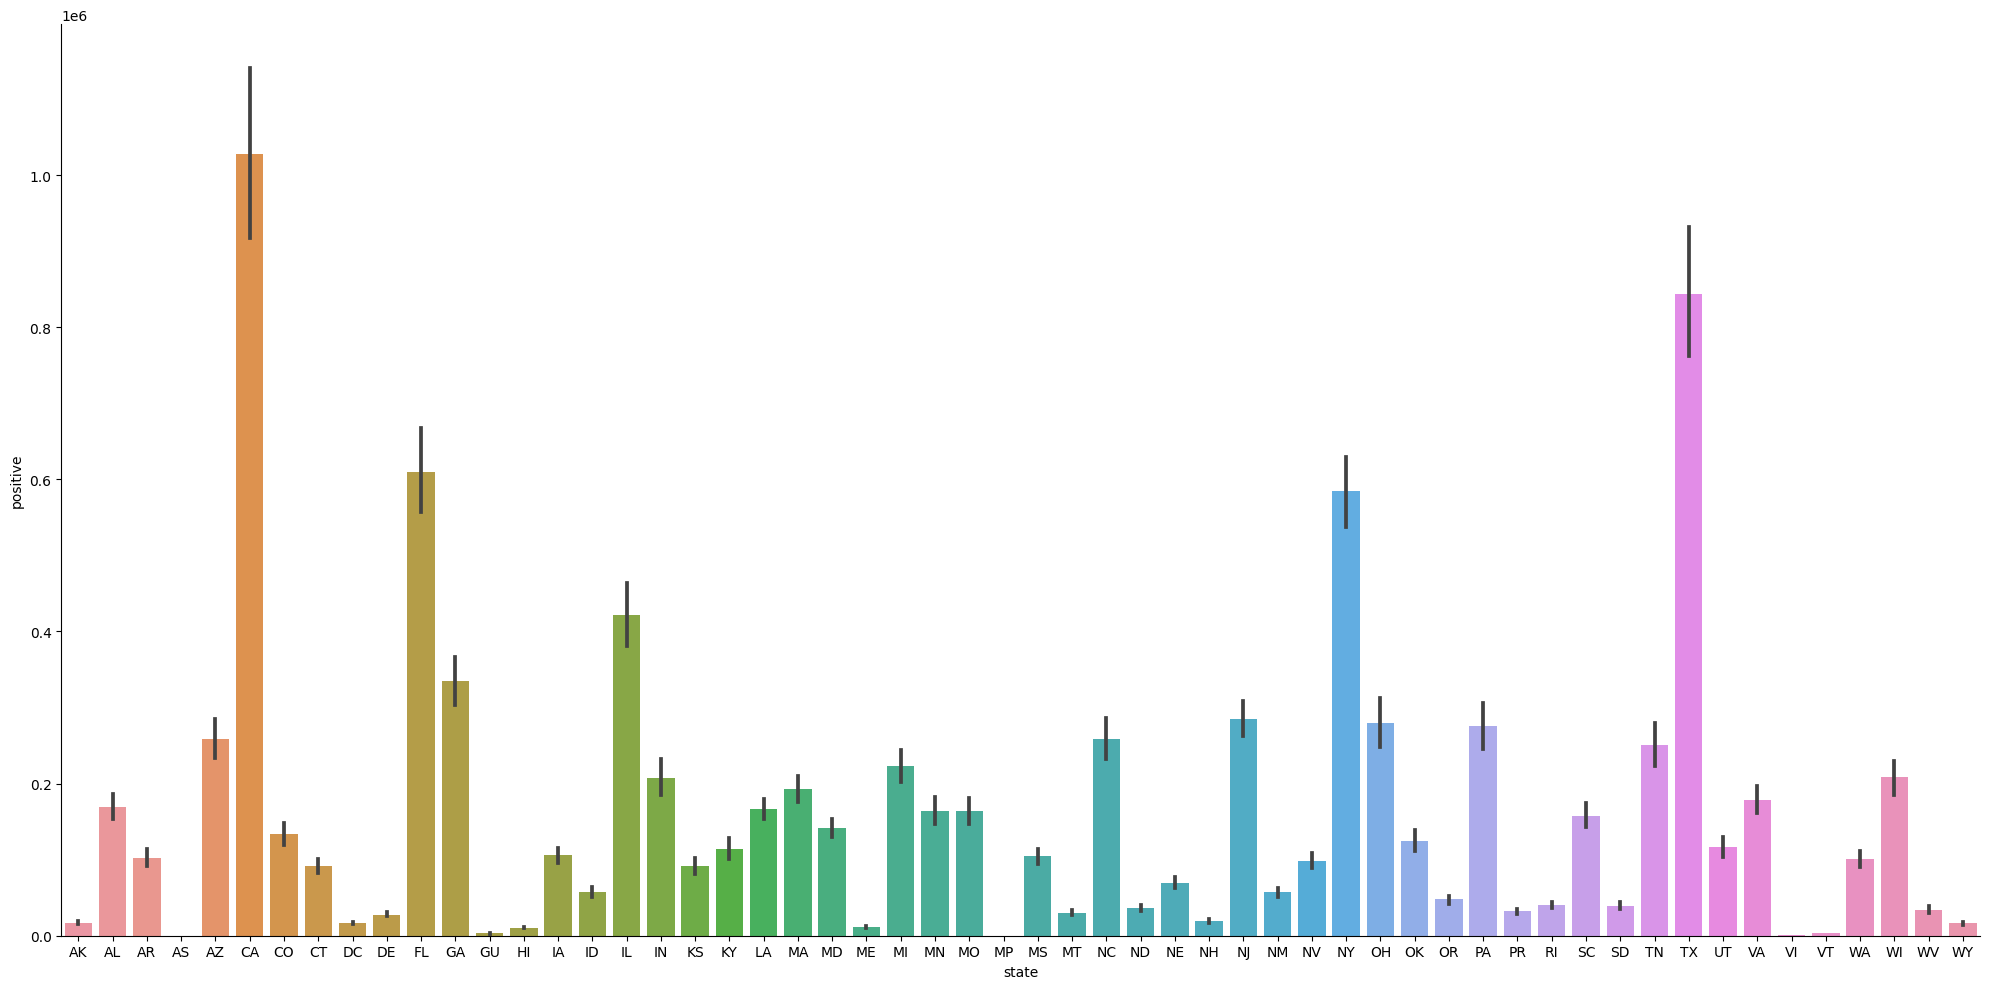

In [67]:
sns.catplot(x="state", y="positive", data=new_df, kind="bar", height=10, aspect=2)